
# **GRIP: The Sparks Foundation**


##GRIPDECEMBER22 
Author: Shaziya Shaikh (Data Science and Business Intelligence Intern)

**Problem Statement**: Create a decision tree classifier and Visulaise it graphically

In [ ]:

!pip install pydotplus
!apt-get install graphviz -y


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [1]:
#importin Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
# load dataset
iris=pd.read_csv("/content/Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#drop Id column
iris.drop('Id',axis=1,inplace=True)

In [6]:
# Use label encoder to convert target variable into binary form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Species']= le.fit_transform(iris['Species'])

In [7]:
# split target variable and features
x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

In [8]:
x.shape

(150, 4)

In [9]:
y.shape

(150,)

In [10]:
# Preparing model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


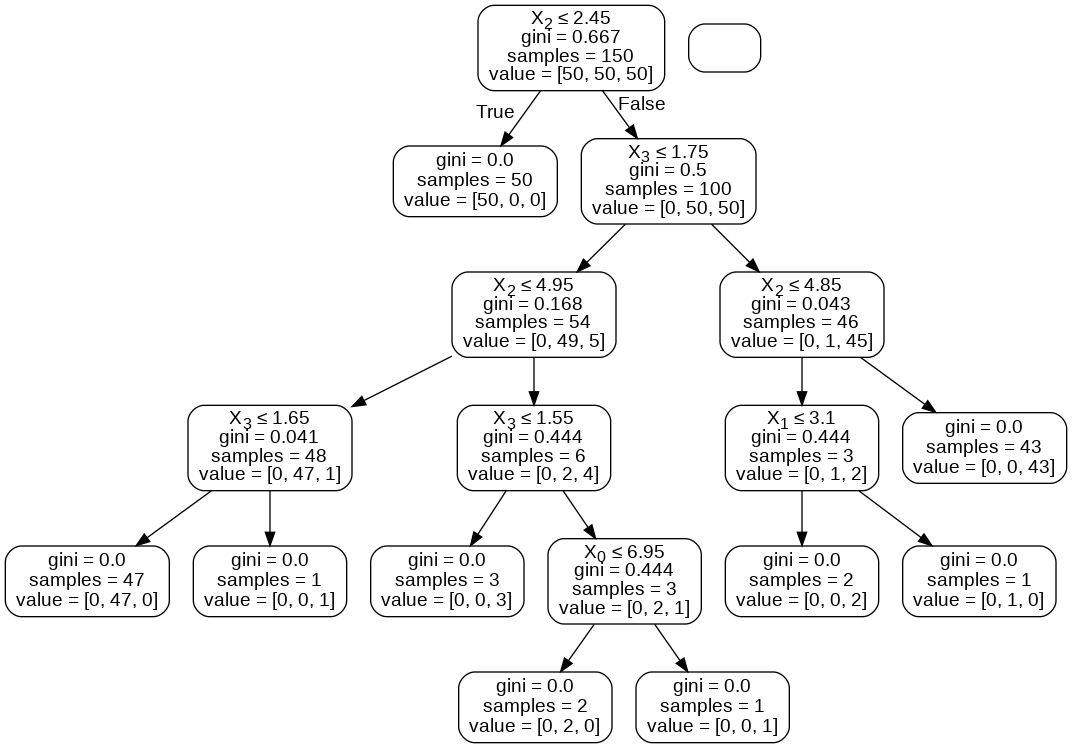

In [11]:
#Printing the decision tree formed using pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=False, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph
Image(graph.create_png())

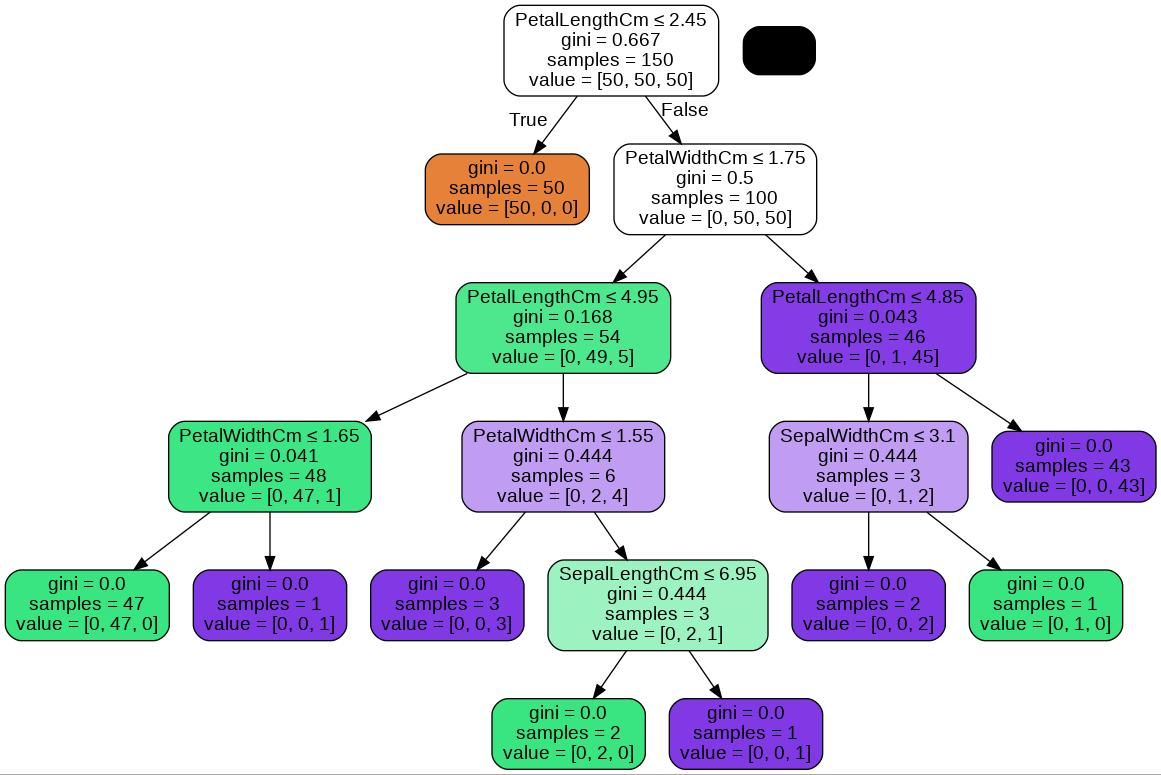

In [12]:
# Printing tree alongwith class names
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_jpeg())